In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

# Wigner functions of mixed states

Here, we will explore the Wigner quasiprobability distributions of "mixed states" (or, more accurately, of mixed ensembles).

## Example: Cat state vs. mixture of coherent states

First: a reminder of what the Wigner function of two coherent states at $x=0$ with opposite momentum look like: 

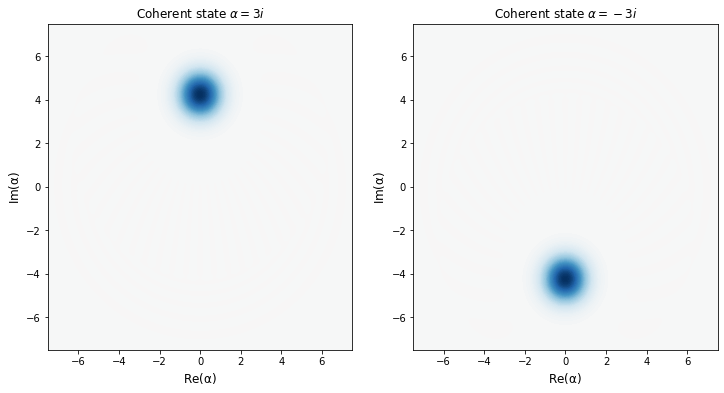

In [2]:
N=30
rho1 = coherent_dm(N,3j)
rho2 = coherent_dm(N,-3j)

fig,ax = plt.subplots(1,2, figsize=(12,6))
plot_wigner(rho1, fig=fig, ax=ax[0])
ax[0].set_title(r"Coherent state $\alpha = 3i$")
plot_wigner(rho2, fig=fig, ax=ax[1])
ax[1].set_title(r"Coherent state $\alpha = -3i$")
plt.show()

Now, let's compare a cat state and a mixed state. 

**Reminder:** a cat state is a superposition of the wave functions: 

$$
|{\rm cat}\rangle =  \tfrac{1}{\sqrt{2}}|\alpha\rangle +  \tfrac{1}{\sqrt{2}}|-\alpha\rangle
$$

whereas a 50/50 "mixed" state is defined by the sum of the density matrices:

$$
\rho_{mix} = \tfrac{1}{2}\rho_\alpha + \tfrac{1}{2}\rho_{-\alpha}
$$

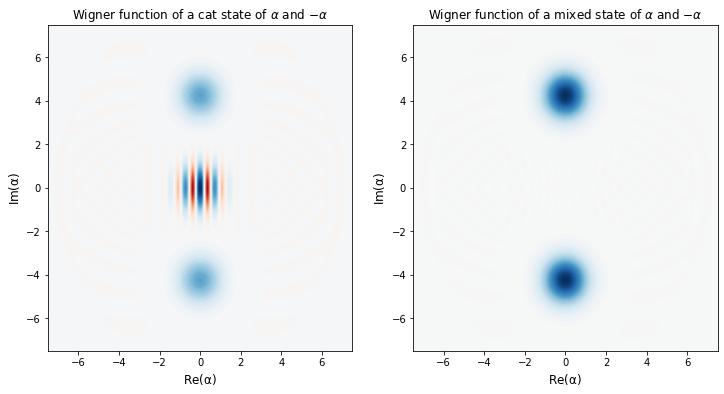

In [3]:
N=30
rho1 = coherent_dm(N,3j)
rho2 = coherent_dm(N,-3j)
mixed = rho1 + rho2

psi1 = coherent(N,3j)
psi2 = coherent(N,-3j)
cat = psi1 + psi2

fig,ax = plt.subplots(1,2, figsize=(12,6))
plot_wigner(cat, fig=fig, ax=ax[0])
ax[0].set_title(r"Wigner function of a cat state of $\alpha$ and $-\alpha$")
plot_wigner(mixed, fig=fig, ax=ax[1])
ax[1].set_title(r"Wigner function of a mixed state of $\alpha$ and $-\alpha$")
plt.show()

What is the difference? The "fringes" are gone! Similar to the coherences in the off-diagonal entries of the density matrix, the fringes of the cat state above are an indication of the "coherence" of the quantum superposition. 

Without this "coherence", the two "wave packets" do not interfere, as you can see if we plot $|\psi(x)|^2$:

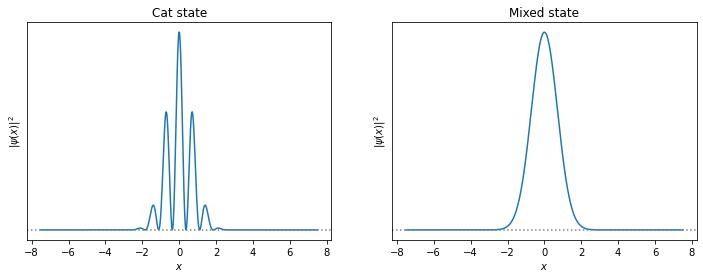

In [4]:
# A hack to calculate the probability distribution
x = np.linspace(-7.5,7.5,500)
wigner_mixed = wigner(mixed,x,x)
wigner_cat = wigner(cat,x,x)

prob_mixed = np.sum(wigner_mixed,axis=0)
prob_cat = np.sum(wigner_cat,axis=0)

# Now the plot
fig,ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(x,prob_cat)
ax[0].set_title("Cat state")
ax[1].plot(x,prob_mixed)
ax[1].set_title("Mixed state")
ax[0].set_yticks([])
ax[1].set_yticks([])
ax[0].axhline(0,ls=':', c='grey')
ax[1].axhline(0,ls=':', c='grey')
ax[0].set_xlabel("$x$")
ax[1].set_xlabel("$x$")
ax[0].set_ylabel(r"$|\psi(x)|^2$")
ax[1].set_ylabel(r"$|\psi(x)|^2$")
plt.show()

Of course, the proper interpretation of the lack of interference is, of course, that in the experiment there are not two wave-packets, but instead just one, and then we repeat the experiment over and over again, each time with only  one coherent  state of either $\alpha$ or $-\alpha$.

## Example:  Superposition vs. mixture of 0 and 1 photons

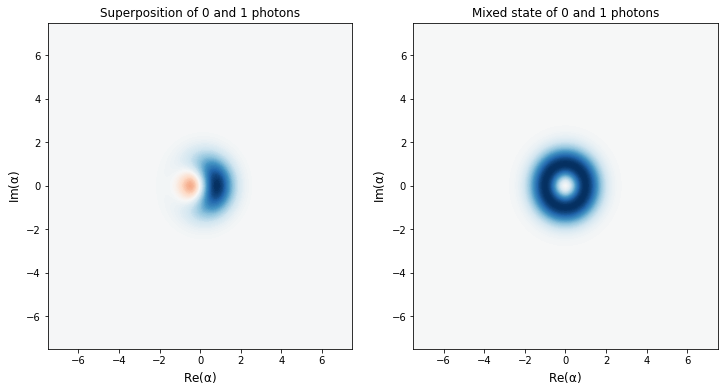

In [5]:
N=30
rho1 = fock_dm(N,0)
rho2 = fock_dm(N,1)
mixed = rho1 + rho2

psi1 = fock(N,0)
psi2 = fock(N,1)
sup = psi1 + psi2

fig,ax = plt.subplots(1,2, figsize=(12,6))
plot_wigner(sup, fig=fig, ax=ax[0])
ax[0].set_title("Superposition of 0 and 1 photons")
plot_wigner(mixed, fig=fig, ax=ax[1])
ax[1].set_title("Mixed state of 0 and 1 photons")
plt.show()

And now the "wave function" of the photon. 

**But first:** a reminder, what is the "wave function" of a photon?

A classical electromagnetic wave is a standing wave whose electric field oscillates in time: for  example, for a given mode, we may have at a given fixed position in space an electric field with the following component in the z-direction:

$$
\vec{E}(t)\cdot \hat{z} = E_z(t) = E_0 \cos(\omega t)
$$

where $\hat{z}$ is a unit vector in the $z$ direction. Note the similarity to the mass-on-a-spring, which oscillates in position: 

$$
x(t) = x_0 \cos(\omega t)
$$

In the mass-spring harmonic oscillator, we have a momentum $p(t)$ that oscillates out of phase with the position:

$$
p(t) = p_0 \sin(\omega t)
$$

In electromagnetism, there is also a magnetic field that also oscillates out of phase with the electric field :

$$
B_y(t) = B_0 \sin(\omega t)
$$

*(Note that if the $E_z$ above belongs to a wave propagating in the $x$ direction, then the magnetic field points in the $y$ direction...)*

The mapping from the mass-spring harmonic oscillator to the photon harmonic oscillator in this case is then: 

* position $\rightarrow$ electric field
* momentum $\rightarrow$ magnetic field

Using this logic, for a photon, one can interpret the axes of the Wigner plots above as:

* Real part of $\alpha$ $\rightarrow$  $E_z$
* Imaginary part of $\alpha$ $\rightarrow$  $B_y$

The probability distributions of position $|\psi(x)|^2$ and momentum $|\phi(p)|^2$ are then replaced with probability  distributions of $E_z$ and $B_y$: 

* $|\psi(x)|^2 \rightarrow |\psi(E_z)|^2$
* $|\phi(p)|^2 \rightarrow |\phi(B_y)|^2$

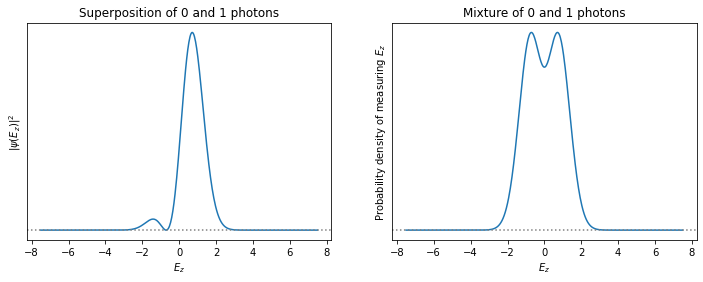

In [6]:
# A hack to calculate the probability distribution
x = np.linspace(-7.5,7.5,500)
wigner_mixed = wigner(mixed,x,x)
wigner_sup = wigner(sup,x,x)

prob_mixed = np.sum(wigner_mixed,axis=0)
prob_cat = np.sum(wigner_sup,axis=0)

# Now the plot
fig,ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(x,prob_cat)
ax[0].set_ylabel(r"$|\psi(E_z)|^2$")
ax[0].set_title("Superposition of 0 and 1 photons")
ax[1].plot(x,prob_mixed)
ax[1].set_ylabel(r"Probability density of measuring $E_z$")
ax[1].set_title(r"Mixture of 0 and 1 photons")
ax[0].set_yticks([])
ax[1].set_yticks([])
ax[0].set_xlabel("$E_z$")
ax[1].set_xlabel("$E_z$")
ax[0].axhline(0,ls=':', c='grey')
ax[1].axhline(0,ls=':', c='grey')
plt.show()

# Homework Lecture 5

## Exercise 1: Cat states

Consider two <a href=https://en.wikipedia.org/wiki/Cat_state>Shroedinger cat states</a> defined by:

$$
|{\rm cat1}\rangle = A \left(|\alpha\rangle + |-\alpha\rangle\right)
$$

$$
|{\rm cat2}\rangle = A \left(|\alpha\rangle - |-\alpha\rangle\right)
$$

where $|\alpha\rangle$ is a coherent state with complex amplitude $\alpha$ and $A$ is a normalisation constant (which is not important now and which you can look up on wikipedia if you like...).  

**(a)** Using the mathematical definition of the coherent state, find the coefficients $c_n = \langle \psi | n \rangle$ of the two cat states. Do not solve for the normalization constant. What do you notice about the photon number distributions of the two cats? 

**(b)** Confirm your result in (a) by creating an $\alpha = 3$ cat state in QuTiP and plotting the Fock (number) distribution. 

**(c)** Make side-by-side plots of the Wigner functions of the two cats in QuTiP. What is different in the Wigner function of the two cats? 

**(d)** A curious property of the coherent state is that if you operate on it with the annihilation operator $\hat a$, and then renormalize the wave function afterwards, you get the same state back. As we will see later, and as maybe makes a bit of sense intuitively, "operating with the annihilation operator" can be interpreted as a measurement of a photon emitted by the quantum state. What happens to the state $|{\rm cat1}\rangle$ if it emits a photon? 

*(In <a href=https://en.wikipedia.org/wiki/Quantum_error_correction#Bosonic_codes>bosonic quantum computing</a>, your answer from (d) are referred to as "parity jumps", for reasons you can probably figure out. If you are interesting in quantum computing with circuit QED, <a href=http://qs3.mit.edu/images/pdf/QS3-2017---Girvin-Lecture-2.pdf>this lecture</a> by Steve Girvin from Yale gives a nice intro to computing with cat states at a level you should be able to follow at least partially)*

## Exercise 2: A funny Wigner function

In his research group meeting, Gary proposes that his team try to create a new type of exotic quantum state with the following Wigner function:

$$
W(x,p) = Axe^{-x^2/l^2}e^{-l^2 p^2 / \hbar^2}
$$

where $A$ is a normalization constant and $l^2 = 2x_{zpf}^2$. 

**(a)** Make a sketch of the function, either by hand or using python's `matplotlib` library.

**(b)** What do you think of Gary's proposal? If you were his PhD student, would you follow his advice? Why / why  not? 

